In [94]:
import json

In [107]:
strategy = "rapture"

import matplotlib.pyplot as plt
import numpy
import datetime

## Number of utilized nodes

In [121]:
def num_utl_nodes():
    metric = "Num_utilized_nodes"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 4])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(int(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Number of utilized nodes")
    plt.show()

## Number game instances per node

In [122]:
def num_game_instance_node():
    metric = "Num_game_instances_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 4])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(int(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Number game instances per node")
    plt.show()

## Number of FPS violating containers per Node

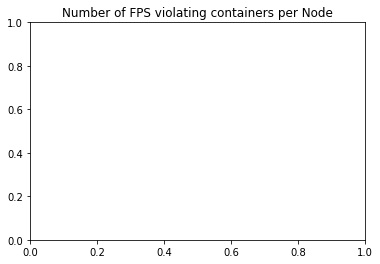

In [132]:
def num_violating_fps():
    metric = "Num_violating_cont_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 4])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(int(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Number of FPS violating containers per Node")
    plt.show()
num_violating_fps()

## Average Framerate Per Node

In [124]:
def avg_fps_node():
    metric = "Avg_FPS_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['hostname'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([20, 35])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Average Framerate Per Node")
    plt.show()

## Minimum Framerate Per Node

In [125]:
def min_fps_node():
    metric = "Min_FPS_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['hostname'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([20, 35])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Minimum Framerate Per Node")
    plt.show()

## FPS per container

In [126]:
def fps_cont():
    metric = "FPS_cont"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
    #     print(content['metric']['container_name'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([20, 35])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("FPS per container")
    plt.show()

# CPU Utilization Node

In [127]:
def cpu_utl_node():
    metric = "CPU_utl_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("CPU utilization Per Node")
    plt.show()

# RAM Utilization Node

In [128]:
def ram_utl_node():
    metric = "RAM_utl_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("CPU utilization Per Node")
    plt.show()

# GPU Utilization Node

In [129]:
def gpu_utl_node():
    metric = "GPU_utl_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("GPU utilization Per Node")
    plt.show()


# VRAM Utilization Node

In [130]:
def vram_utl_node():
    metric = "VRAM_utl_node"
    contents = []
    with open("../experiment_data/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("Video memory utilization Per Node")
    plt.show()


Test Data


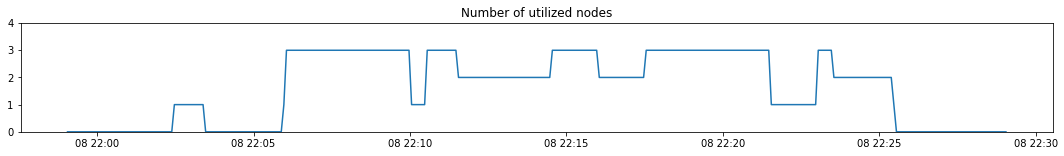

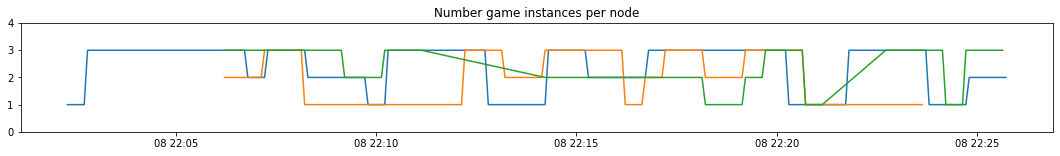

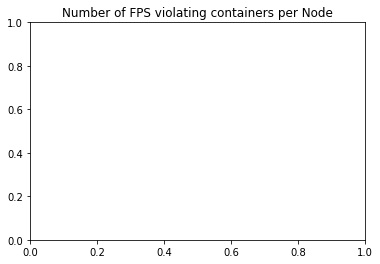

FPS Data


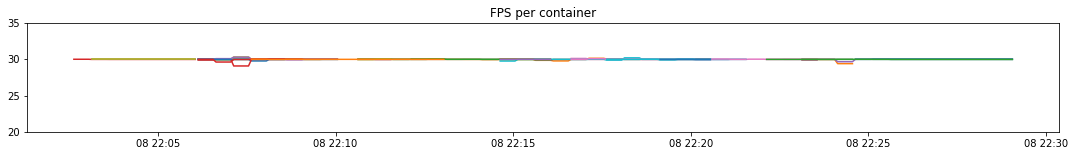

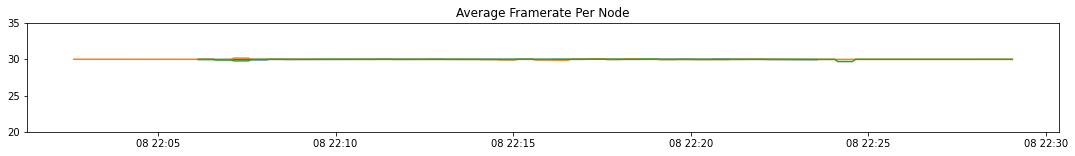

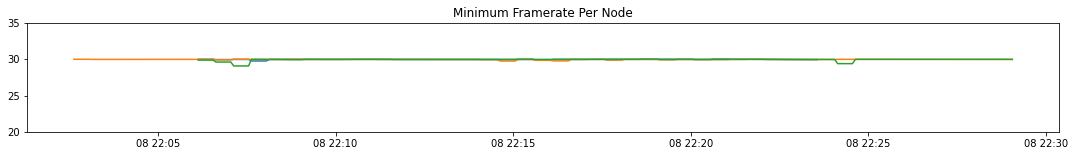

System data


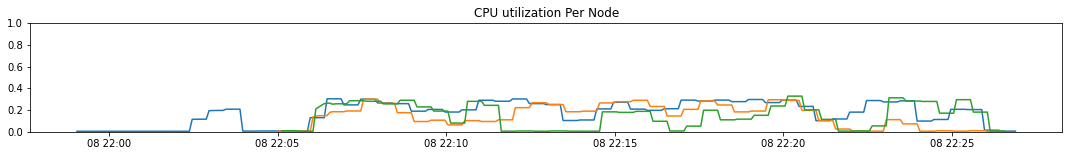

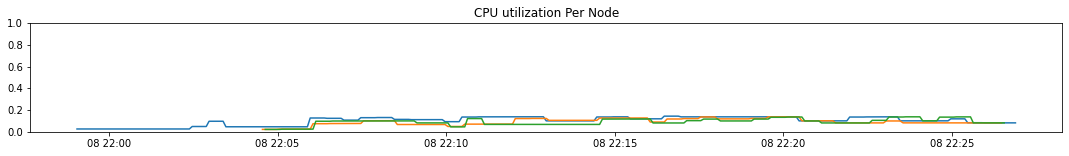

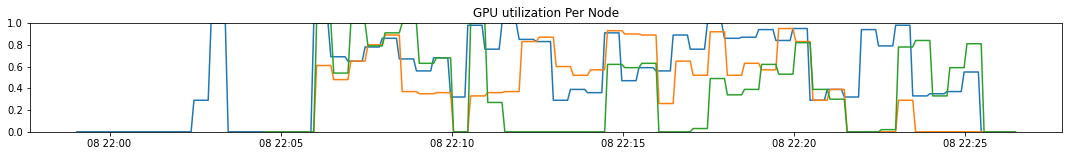

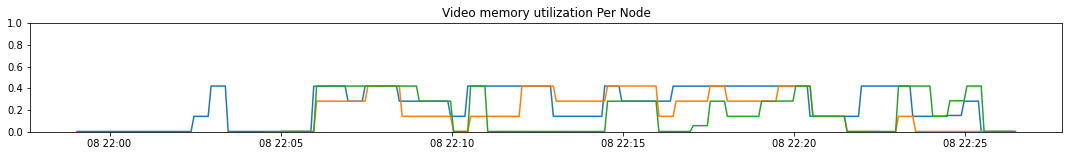

In [133]:
print("Test Data")
#desired game instances
num_utl_nodes()
num_game_instance_node()
num_violating_fps()
print("FPS Data")
fps_cont()
avg_fps_node()
min_fps_node()
print("System data")
cpu_utl_node()
ram_utl_node()
gpu_utl_node()
vram_utl_node()
